#SCRIPT ANÁLISE TEMPORAL

Lista de itens obrigatórios para essa exploração:
1. Recuperação dos dados
 1. Recuperar os dados de visualização sobre a cidade de Phoenix agrupados por dia, por mês e por ano;
 2. Ordenar as observações de forma ascendente temporalmente (da observação mais antiga para a observação mais recente).
2. Visualização dos dados em forma de Série Temporal:
 1. Observar o gráfico em barras da série temporal para o ano x de forma a investigar como se comporta a distribuição das visualizações.
 2. Observar o gráfico de linha da evolução do número de observações ao longo do tempo (anos).
3. Construção dos conjuntos de Treinamento e Teste:
 1. Separar 70% das observações para treinamento e 30% das observações para teste (como se trata de uma informação temporal, não podemos pegar uma amostra aleatória, sugestão: calcular o índice que corresponde a 70% das observações e considerar da primeira amostra até ele para treinamento; e do índice seguinte até o final para teste).
4. Investigar os parâmetros para discriminar o melhor modelo:
 1. Utilizando o pacote statsmodels, vamos testar uma família de métodos apropriados para lidar com previsão de séries temporais chamados conjuntamente de SARIMAX (Links para um site externo.), ou seja, utilize a função SARIMAX para criar um modelo;
 2. Em seguida, chame a função fit() para ajustar o modelo;
 3. Para medir a qualidade do modelo ajustado, acesse a propriedade AIC do resultado. O Critério de Informação de Akaike (AIC em inglês) é uma métrica "quanto menor melhor", dessa forma, ao comparar modelos diferentes, aquele que possuir o menor valor de AIC é o melhor.
  4. Exemplo de qualidade do modelo de acordo com o parâmetro AIC:
  > A qualidade do modelo estimada pelo AIC é: 1085.2222824883293.
5. A última etapa é realizar uma previsão utilizando o melhor modelo:
  1. Utilizando a função forecast sobre o modelo ajustado, faça uma previsão apropriada para a quantidade de dias que existem no seu conjunto de teste;
  2. Calcule o erro médio e o desvio-padrão com relação ao seu conjunto de testes.
    1. O erro médio foi de: 12.5% e o desvio-padrão foi de: 44.45%




### Etapa inicial
#### P1: Recuperação dos dados
 1. Recuperar os dados de visualização sobre a cidade de Phoenix agrupados por dia, por mês e por ano;
 2. Ordenar as observações de forma ascendente temporalmente (da observação mais antiga para a observação mais recente).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Ordenar as observações de forma ascendente temporalmente (da observação mais antiga para a observação mais recente).
df_ovnis = pd.read_csv("df_OVNI_preparado.csv", index_col=[0])

#Cria um novo dataframe com os dados da cidade de Phoenix
df_ovnis = df_ovnis[df_ovnis['CITY']=='Phoenix']

#agrupa por data
df_views = df_ovnis
df_views['Views'] = df_views.groupby('SIGHT_DATE')['SIGHT_DATE'].transform('count')

#Excluir as colunas cujo os dados não são necessários
df_views = df_views.drop(columns=["SIGHT_MONTH"])
df_views = df_views.drop(columns=["SIGHT_DAY"])
df_views = df_views.drop(columns=["SIGHT_WEEKDAY"])
df_views = df_views.drop(columns=["SHAPE"])
df_views = df_views.drop(columns=["STATE"])
df_views = df_views.drop(columns=["CITY"])
df_views = df_views.drop(columns=["SIGHT_TIME"])
df_views.sort_values(by='SIGHT_DATE')

,SIGHT_DATE,Views
Unnamed: 0,,
31865,01/01/12,1
63340,01/01/16,1
21070,01/02/10,1
63318,01/02/16,1
47834,01/04/14,1
...,...,...
10199,12/27/7,1
38863,12/28/12,1
46610,12/30/13,1


### P2: Visualização dos dados em forma de Série Temporal:


#### 1. Observar o gráfico em barras da série temporal para o ano x de forma a investigar como se comporta a distribuição das visualizações.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


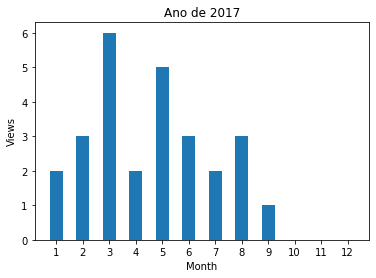

In [24]:
#Atribui o daframe a uma outro para manipulção mais livre
df_mes = df_ovnis
#Define o ano que quer ser visto no grafico
ano = 2017

#Transforma a coluna 'Sight_Date' em formato de data para separar o ano
df_mes['SIGHT_DATE'] = pd.to_datetime(df_mes['SIGHT_DATE'])
#Separa o ano em uma coluna propria
df_mes['SIGHT_YEAR'] = df_mes['SIGHT_DATE'].dt.strftime('%Y')
#transforma o ano em string
df_mes = df_mes[df_ovnis['SIGHT_YEAR'] == str(ano)]
#Conta quantas visualizacoes cada mes tem
df_mes["Views"] = df_mes.groupby('SIGHT_MONTH')['SIGHT_MONTH'].transform('count')

#cria um vetor com todos os meses do ano
mes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#cria um vetor vazio que tera as views de cada mes
views = []

#no primeiro for ele vai rodar todos os 12 meses
for j in mes:
  #flag para nao duplicar o numero de views de meses repetidos
  flag = 0
  #segundo for que ira interar linha por linha do dataframe
  for i in df_mes.itertuples():
    if(str(df_mes.SIGHT_MONTH[i.Index]) == str(j) and flag == 0):
      #atribui o numero do mes correspondente (representado pelo j)
      views.append(df_mes.Views[i.Index])
      flag = 1

#preenche os meses cujo n tiveram observacoes registradas com o valor zero
if(len(views) < 12):
  meses_sem_views = 12 - len(views)
  for i in range(meses_sem_views):
    views.append(0)

#----PLOTANDO O GRAFICO-----

#cria distancia entre as barras
x1 =  np.arange(len(views))

# Plota as barras
plt.bar(x1, views, width=0.5, label = 'Produto A')

# coloca o nome dos meses como label do eixo x
plt.xticks([x for x in range(len(views))], mes)

plt.title("Ano de "+ str(ano))
plt.xlabel('Month')
plt.ylabel('Views')
plt.show()

#### 2. Observar o gráfico de linha da evolução do número de observações ao longo do tempo (anos).

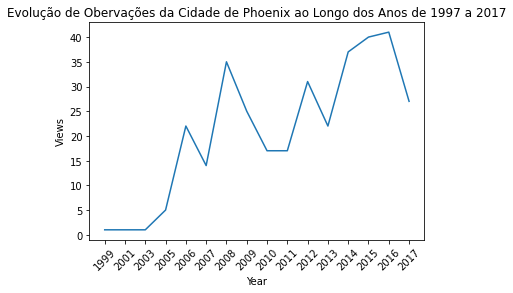

In [4]:
#Atribui o daframe a uma outro para manipulção mais livre#Atribui o daframe a uma outro para manipulção mais livre
df_anos = df_ovnis

#Array vazio que tera os anos de 1997 a 2017
anos = []
#Array vazio que tera as views correspondennte ao periodo pedido
views = []
#Anos que aparecerao no grafico
anos_grafico = []

#Transforma a coluna 'Sight_Date' em formato de data para separar o ano
df_anos['SIGHT_DATE'] = pd.to_datetime(df_anos['SIGHT_DATE'])
#Separa o ano em uma coluna propria
df_anos['SIGHT_YEAR'] = df_anos['SIGHT_DATE'].dt.strftime('%Y')
#Conta quantas visualizacoes cada ano tem
df_anos["Views"] = df_anos.groupby('SIGHT_YEAR')['SIGHT_YEAR'].transform('count')

#intera os anos de 1997 a 2017 no array 'anos'
for i in range(1997, 2018):
  anos.append(i)

#no primeiro for ele vai rodar todos os os anos que o array rececbeu
for j in anos:
  #flag para nao duplicar o numero de views de anos repetidos
  flag = 0
  #segundo for que ira interar linha por linha do dataframe
  for i in df_anos.itertuples():
    if(df_anos.SIGHT_YEAR[i.Index] == str(j) and flag == 0):
      #atribui o ano correspondente a view adicionada
      anos_grafico.append(str(j))
      #atribui o numero do ano correspondente (representado pelo j)
      views.append(df_anos.Views[i.Index])
      flag = 1

#Atribui o 'anos_grafico' como anos do eixo x e as views no eixo y
plt.plot(anos_grafico, views)
plt.xlabel('Year')
plt.ylabel('Views')
plt.title("Evolução de Obervações da Cidade de Phoenix ao Longo dos Anos de 1997 a 2017")
plt.xticks(rotation=45)

plt.show()

###P3. Construção dos conjuntos de Treinamento e Teste:
 #### 1. Separar 70% das observações para treinamento e 30% das observações para teste (como se trata de uma informação temporal, não podemos pegar uma amostra aleatória, sugestão: calcular o índice que corresponde a 70% das observações e considerar da primeira amostra até ele para treinamento; e do índice seguinte até o final para teste).

In [5]:
# Transformamos o 'Sight_date' de df_views em tipo Date. 
df_views['SIGHT_DATE'] = pd.to_datetime(df_views['SIGHT_DATE'])
# Definimos o 'Sight_Date' como o index.
df_views.set_index('SIGHT_DATE', inplace = True)
df_views

,Views
SIGHT_DATE,
1999-06-12,1
2001-11-12,1
2003-05-31,1
2005-02-21,1
2005-03-20,1
...,...
2017-07-06,1
2017-08-27,1
2017-08-14,1


In [6]:
df_views.head()

,Views
SIGHT_DATE,
1999-06-12,1
2001-11-12,1
2003-05-31,1
2005-02-21,1
2005-03-20,1


In [7]:
# Isso separa os conjunto df_views no conjunto de treinamento (df_train) e no conjunto de teste (df_test).
# O conjunto df_train possui 70% dos dados do conjunto df_views, enquanto o df_test possui 30% dos dados.
df_train, df_test = df_views.iloc[:235, :], df_views.iloc[235:, :]

In [8]:
df_train.shape

(235, 1)

In [9]:
df_train.head()

,Views
SIGHT_DATE,
1999-06-12,1
2001-11-12,1
2003-05-31,1
2005-02-21,1
2005-03-20,1


In [10]:
df_test.shape

(101, 1)

In [11]:
df_test.head()

,Views
SIGHT_DATE,
2015-02-11,2
2015-03-20,1
2015-03-14,1
2015-03-13,1
2015-03-06,2


###P4. Investigar os parâmetros para discriminar o melhor modelo:



 #### 1. Utilizando o pacote statsmodels, vamos testar uma família de métodos apropriados para lidar com previsão de séries temporais chamados conjuntamente de SARIMAX (Links para um site externo.), ou seja, utilize a função SARIMAX para criar um modelo;
 

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
#df_ovnis_train = pd.read_csv("df_OVNI_preparado.csv")
x_train, x_test, y_train, y_test = train_test_split(df_views.drop('Views',axis=1), df_views['Views'], test_size=0.3, random_state=0, shuffle=False)

x_train.shape, y_train.shape

#x_test.shape, y_test.shape

((235, 0), (235,))

In [13]:
x_test.shape, y_test.shape

((101, 0), (101,))

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
% matplotlib inline
sarimax_model = SARIMAX(df_train, order=(1,0,0))
#sarimax_model = SARIMAX(df_ovnis['Views'], freq='MS', order=(1,1,1), seasonal_order=(1,1,1,12),exog=df_ovnis['Views']).fit(x_train, y_train)
#sarimax_model = sm.tsa.statespace.SARIMAX(df_train, order=(1,0,0))
#res = sarimax_model(disp=False)
#res.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### 2. Em seguida, chame a função fit() para ajustar o modelo;
#### 3. Para medir a qualidade do modelo ajustado, acesse a propriedade AIC do resultado. O Critério de Informação de Akaike (AIC em inglês) é uma métrica "quanto menor melhor", dessa forma, ao comparar modelos diferentes, aquele que possuir o menor valor de AIC é o melhor.
#### 4. Exemplo de qualidade do modelo de acordo com o parâmetro AIC:
  > A qualidade do modelo estimada pelo AIC é: 1085.2222824883293.

In [15]:
res = sarimax_model.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Views   No. Observations:                  235
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -216.059
Date:                Fri, 30 Oct 2020   AIC                            436.118
Time:                        18:40:48   BIC                            443.038
Sample:                             0   HQIC                           438.908
                                - 235                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9206      0.014     67.830      0.000       0.894       0.947
sigma2         0.3653      0.009     40.883      0.000       0.348       0.383
===================================================================================
Ljung-Box (Q):                       66.26   Jarque-Bera (JB):             11718.31
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###P5. A última etapa é realizar uma previsão utilizando o melhor modelo:
  #### 1. Utilizando a função forecast sobre o modelo ajustado, faça uma previsão apropriada para a quantidade de dias que existem no seu conjunto de teste;
  

In [16]:
df_forecast = res.forecast(101)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [17]:
df_forecast

235    1.841266
236    1.695130
237    1.560593
238    1.436734
239    1.322704
         ...   
331    0.000657
332    0.000605
333    0.000557
334    0.000512
335    0.000472
Length: 101, dtype: float64

In [18]:
df_forecast = pd.DataFrame(res.forecast(101), columns=['Views'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [19]:
df_forecast

,Views
235,1.841266
236,1.695130
237,1.560593
238,1.436734
239,1.322704
...,...
331,0.000657
332,0.000605
333,0.000557
334,0.000512


In [20]:
df_test

,Views
SIGHT_DATE,
2015-02-11,2
2015-03-20,1
2015-03-14,1
2015-03-13,1
2015-03-06,2
...,...
2017-07-06,1
2017-08-27,1
2017-08-14,1


In [21]:
array_forecast = []
array_test = []
diferenca = []

for i in df_forecast.itertuples():
  array_forecast.append(float(df_forecast.Views[i.Index]))

for index, row in df_test.iterrows():
  teste = str(row["Views"])
  array_test.append(float(teste))

for i in range(101):
  diferenca.append(array_forecast[i] - array_test[i])

print(diferenca)

[-0.15873391367627887, 0.6951304003229364, 0.560593059005488, 0.43673353704949935, -0.6772956315734158, -0.782274652091947, 0.12107819277992626, 0.03210162824138241, -0.049813137139824826, -0.1252265768726155, -0.19465468138911812, -0.2585724885311056, -0.3174173338324665, -0.37159184283664726, -0.42146668592296577, -0.46738311449074355, -0.509655295854221, -0.5485724628239692, -0.5844008926825669, -0.6173857290949989, -0.6477526594195724, -0.6757094588957686, -0.701447412274605, -1.7251426226185211, -1.7469572162258014, -5.767040451923811, -5.785529742321006, -5.80255159400528, -5.818222473121622, -5.8326496022515215, -5.845931694046471, -0.8581596266352098, -0.8694170654259588, -0.8797810355580942, -0.8893224489200808, -0.8981065893395916, -0.9061935592655671, -0.9136386909984764, -0.9204929252824855, -0.9268031598499172, -0.932612570302797, -0.9379609055270081, -0.9428847596603233, -2.9474178224751624, -2.9515911098892316, -2.955433176181235, -1.9589703093636721, -1.9622267110494878

#### 2. Calcule o erro médio e o desvio-padrão com relação ao seu conjunto de testes.
    1. O erro médio foi de: 12.5% e o desvio-padrão foi de: 44.45%

In [22]:
print("Erro Médio:")
# O Erro Médio é calculado quando calculamos o valor absoluto 
# da diferença entre o forecast e df_teste, depois pegamos a media desse vetor 
# resultante.
np.mean(np.abs(diferenca))

Erro Médio:


1.3910627987877098

In [23]:
print("Desvio Padrão:")
# O metódo que calcula o desvio padrão da amostra é .std()
# ddof modifica o divisor da sum dos quadrados das amostras-menos-média. 
# O divisor é N - ddof , onde o padrão ddof é 0 como você pode ver no seu
# resultado.
np.std(diferenca, ddof=1)


Desvio Padrão:


1.3347654821351955